In [1]:
import pandas as pd

pd.set_option('display.max_columns', 20)
data = pd.read_csv('C:/Users/victo/Documents/projects/project-tof-ML/project-tof-machine-learning/datas/GlobalTemperatures.csv')

data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.shape

(3192, 9)

In [3]:
print(data.isnull().sum())

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [4]:
data.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [5]:
missing = ((data.isnull().sum()) / len(data['dt']) * 100)
print(missing)

dt                                            0.000000
LandAverageTemperature                        0.375940
LandAverageTemperatureUncertainty             0.375940
LandMaxTemperature                           37.593985
LandMaxTemperatureUncertainty                37.593985
LandMinTemperature                           37.593985
LandMinTemperatureUncertainty                37.593985
LandAndOceanAverageTemperature               37.593985
LandAndOceanAverageTemperatureUncertainty    37.593985
dtype: float64


In [6]:
data['LandAverageTemperature'].fillna(data['LandAverageTemperature'].median(), inplace = True)
data['LandAverageTemperatureUncertainty'].fillna(data['LandAverageTemperatureUncertainty'].median(), inplace = True)
data['LandMaxTemperature'].fillna(data['LandMaxTemperature'].median(), inplace = True)
data['LandMaxTemperatureUncertainty'].fillna(data['LandMaxTemperatureUncertainty'].median(), inplace = True)

data.drop('LandMinTemperature', axis = 1, inplace = True)
data.drop('LandMinTemperatureUncertainty', axis = 1, inplace = True)
data.drop('LandAndOceanAverageTemperature', axis = 1, inplace = True)
data.drop('LandAndOceanAverageTemperatureUncertainty', axis = 1, inplace = True)

data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty
0,1750-01-01,3.034,3.574,14.76,0.252
1,1750-02-01,3.083,3.702,14.76,0.252
2,1750-03-01,5.626,3.076,14.76,0.252
3,1750-04-01,8.490,2.451,14.76,0.252
4,1750-05-01,11.573,2.072,14.76,0.252


In [7]:
missing = ((data.isnull().sum()) / len(data['dt']) * 100)
print(missing)

dt                                   0.0
LandAverageTemperature               0.0
LandAverageTemperatureUncertainty    0.0
LandMaxTemperature                   0.0
LandMaxTemperatureUncertainty        0.0
dtype: float64


In [8]:
data['dt'] = data['dt'].astype("string")
k = data['dt'].apply(lambda z: z.replace("-", "0"))

# for z in k:
#     k[z] = k[z].replace("-", "0")

print(k)
x = k.apply(lambda z: float(z))
x = x.apply(lambda z:  z/10000)
x = x.apply(lambda z: round(z, 0))
x = x.apply(lambda z: float(z))
y = data['LandAverageTemperature']

print(x)

0       1750001001
1       1750002001
2       1750003001
3       1750004001
4       1750005001
           ...    
3187    2015008001
3188    2015009001
3189    2015010001
3190    2015011001
3191    2015012001
Name: dt, Length: 3192, dtype: object
0       175000.0
1       175000.0
2       175000.0
3       175000.0
4       175001.0
          ...   
3187    201501.0
3188    201501.0
3189    201501.0
3190    201501.0
3191    201501.0
Name: dt, Length: 3192, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

x = x.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [10]:
model.intercept_

-0.2738588485981115

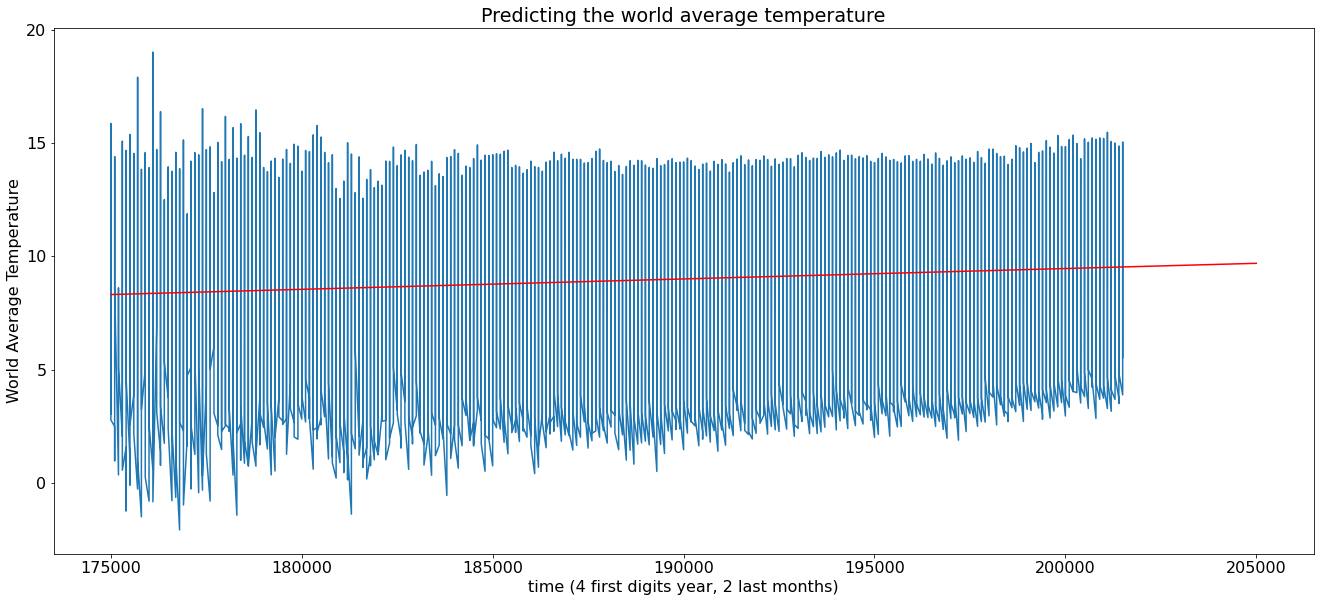

In [11]:
# mostrando o resultado
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size = 16)

xreg = np.arange(175000, 210000, 5000)

fig, ax = plt.subplots(figsize=(25, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x, y)
ax.set_title('Predicting the world average temperature')
ax.set_xlabel('time (4 first digits year, 2 last months)')
ax.set_ylabel('World Average Temperature')

plt.plot(xreg, model.coef_ * xreg - model.intercept_, color = 'red') # gráfico da regressão
plt.show()

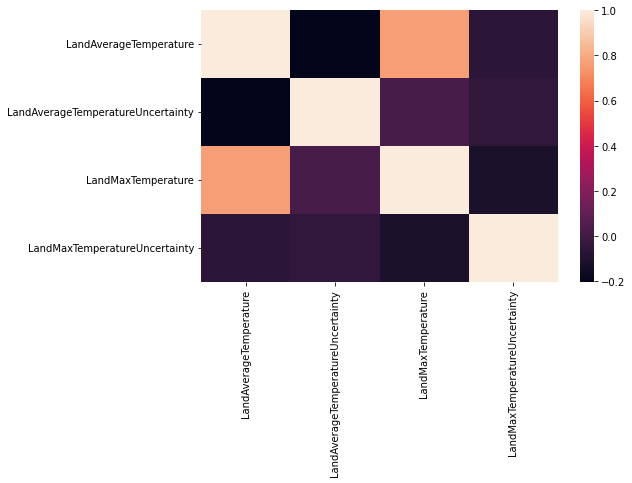

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size = 10)
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(method = 'pearson'))
plt.show()